# Lab | Classification: Unsupervised Machine Learning
For this lab we will build a model on customer churn binary classification problem. You will be using Data/DATA_Customer-Churn.csv file.

Scenario
You are working as an analyst for an internet service provider. You are provided with this historical data about your company's customers and their churn trends. Your task is to build a machine learning model that will help the company identify customers that are more likely to default/churn and thus prevent losses from such customers.

Instructions
-- Round 1

- Import the required libraries and modules that you would need.
- Read that data into Python and call the dataframe churnData.
- Check the datatypes of all the columns in the data. You will see that the column TotalCharges is object type.
- Convert this column into numeric type using pd.to_numeric function.
- Check for null values in the dataframe. Replace the null values.
- Use the following features: tenure, SeniorCitizen, MonthlyCharges and TotalCharges:
- Split the data into a training set and a test set.
- Scale the features either by using normalizer or a standard scaler.
- (optional)Fit a logistic Regression model on the training data.
- Fit a Knn Classifier(NOT KnnRegressor please!)model on the training data.

# KNN Classification

- Import the required libraries and modules that are neeed.

In [1]:
import pandas as pd
import numpy as np
## plotting libraries
from matplotlib import pyplot as plt
import seaborn as sns
## Sklearn libraries
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
import warnings
warnings.filterwarnings('ignore')

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

%matplotlib inline

In [2]:
TT_SPLIT = 0.2     # ratio train/test size
RAND_STATE = 123   # specifies a sampling for repeatable results

<b>load datasets
- Read that data into Python and call the dataframe churnData.

In [4]:
df = pd.read_csv("DATA_Customer-Churn.csv")

df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.6,Yes


# Data Cleaning

- Check the datatypes of all the columns in the data. You will see that the column TotalCharges is object type.

- Check for null values in the dataframe. Replace the null values.

In [5]:
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [8]:
df.columns= ['gender', 'Senior_Citizen', 'Partner', 'Dependents', 'tenure',
       'Phone_Service', 'Online_Security', 'Online_Backup', 'Device_Protection',
       'Tech_Support', 'Streaming_TV', 'Streaming_Movies', 'Contract',
       'Monthly_Charges', 'Total_Charges', 'Churn']
df.columns

Index(['gender', 'Senior_Citizen', 'Partner', 'Dependents', 'tenure',
       'Phone_Service', 'Online_Security', 'Online_Backup',
       'Device_Protection', 'Tech_Support', 'Streaming_TV', 'Streaming_Movies',
       'Contract', 'Monthly_Charges', 'Total_Charges', 'Churn'],
      dtype='object')

In [9]:
df.columns=df.columns.str.lower()
df.columns

Index(['gender', 'senior_citizen', 'partner', 'dependents', 'tenure',
       'phone_service', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'contract', 'monthly_charges', 'total_charges', 'churn'],
      dtype='object')

In [10]:
df.dtypes

gender                object
senior_citizen         int64
partner               object
dependents            object
tenure                 int64
phone_service         object
online_security       object
online_backup         object
device_protection     object
tech_support          object
streaming_tv          object
streaming_movies      object
contract              object
monthly_charges      float64
total_charges         object
churn                 object
dtype: object

- You will see that the column TotalCharges is object type.
- Convert this column into numeric type using pd.to_numeric function.

In [11]:
df["total_charges"]=df["total_charges"].replace(' ',np.nan).astype(float)
df

,gender,senior_citizen,partner,dependents,tenure,phone_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,monthly_charges,total_charges,churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.50,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.60,Yes


In [12]:
df=df.dropna(subset=["total_charges"])#replace any na
df["total_charges"]=df["total_charges"].replace('',np.nan).astype(float)
#df["total_charges"]= df["total_charges"].str.astype(float)
df["total_charges"]= pd.to_numeric(df["total_charges"])#, errors='coerce'
df.dtypes

gender                object
senior_citizen         int64
partner               object
dependents            object
tenure                 int64
phone_service         object
online_security       object
online_backup         object
device_protection     object
tech_support          object
streaming_tv          object
streaming_movies      object
contract              object
monthly_charges      float64
total_charges        float64
churn                 object
dtype: object

In [13]:
df.dtypes

gender                object
senior_citizen         int64
partner               object
dependents            object
tenure                 int64
phone_service         object
online_security       object
online_backup         object
device_protection     object
tech_support          object
streaming_tv          object
streaming_movies      object
contract              object
monthly_charges      float64
total_charges        float64
churn                 object
dtype: object

- Use the following features: tenure, SeniorCitizen, MonthlyCharges and TotalCharges:

In [14]:
df.columns

Index(['gender', 'senior_citizen', 'partner', 'dependents', 'tenure',
       'phone_service', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'contract', 'monthly_charges', 'total_charges', 'churn'],
      dtype='object')

In [15]:
df=df[['tenure','senior_citizen', 'monthly_charges', 'total_charges', 'churn']]

df

,tenure,senior_citizen,monthly_charges,total_charges,churn
0,1,0,29.85,29.85,No
1,34,0,56.95,1889.50,No
2,2,0,53.85,108.15,Yes
3,45,0,42.30,1840.75,No
4,2,0,70.70,151.65,Yes
...,...,...,...,...,...
7038,24,0,84.80,1990.50,No
7039,72,0,103.20,7362.90,No
7040,11,0,29.60,346.45,No
7041,4,1,74.40,306.60,Yes


- Split the data into a training set and a test set.

In [16]:
df["churn"]=df["churn"].eq('Yes').mul(1)

In [17]:
df

,tenure,senior_citizen,monthly_charges,total_charges,churn
0,1,0,29.85,29.85,0
1,34,0,56.95,1889.50,0
2,2,0,53.85,108.15,1
3,45,0,42.30,1840.75,0
4,2,0,70.70,151.65,1
...,...,...,...,...,...
7038,24,0,84.80,1990.50,0
7039,72,0,103.20,7362.90,0
7040,11,0,29.60,346.45,0
7041,4,1,74.40,306.60,1


In [18]:
columns=df.columns

In [19]:
X = df.drop('churn', axis=1)#target is total_charges
y = df.churn

In [20]:
columns=X.columns

In [21]:
TT_SPLIT = 0.2     # ratio train/test size
RAND_STATE = 123 

# Split

In [22]:
#Train the model
# test-train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TT_SPLIT, random_state=RAND_STATE)
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

In [23]:
y_train

5481    1
5434    0
3569    0
2101    1
7019    0
       ..
5227    0
4067    0
1351    0
3460    0
3588    0
Name: churn, Length: 5625, dtype: int64

# Scale

In [24]:
from sklearn.preprocessing import StandardScaler
#X_train is the data
X_train = np.array(X_train)#.reshape(-1,1)
scaler = StandardScaler()
X_train_std= scaler.fit(X_train)
X_train_std= X_train_std.transform(X_train)
X_train_std= pd.DataFrame(X_train_std)
X_train_std.columns = columns
#std["customer_lifetime_value2"]=numerical["customer_lifetime_value"]
X_train_std

,tenure,senior_citizen,monthly_charges,total_charges
0,-1.287268,2.292804,0.284676,-0.983133
1,0.017278,-0.436147,1.006462,0.426036
2,-0.634995,-0.436147,-1.505620,-0.878838
3,0.180346,-0.436147,1.136484,0.637071
4,0.261880,-0.436147,-1.498953,-0.651980
...,...,...,...,...
5620,-1.042666,-0.436147,1.036467,-0.733981
5621,1.444126,-0.436147,0.483042,1.412279
5622,-0.879598,-0.436147,-1.488951,-0.905159
5623,0.628784,-0.436147,1.164822,1.112179


In [25]:
y_train.dtypes

dtype('int64')

# Fit: A logistic Regression model on the training data.

In [26]:
#model fitting
model=LogisticRegression()     # model
model.fit(X_train_std, y_train)   # model train


LogisticRegression()

# Transform x test

In [27]:
X_test=scaler.transform(X_test)
X_test

array([[ 0.09881214, -0.4361471 , -1.4972857 , -0.7143061 ],
       [-0.59422811, -0.4361471 ,  0.35968863, -0.41119044],
       [ 1.32182435,  2.29280443,  1.26817248,  1.97420855],
       ...,
       [-0.63499519, -0.4361471 ,  0.9147806 , -0.34866582],
       [ 1.60719387, -0.4361471 ,  1.02646577,  2.0453823 ],
       [-1.28726837,  2.29280443, -0.83050856, -0.99785668]])

In [28]:
#model parameters
model.coef_

array([[-1.55533618,  0.22319862,  0.85110972,  0.25556622]])

In [29]:
#model parameters
model.intercept_

array([-1.51172547])

# Prediction

In [30]:
#make prediction
y_pred = pd.DataFrame(model.predict(X_test),columns = ['churn'] )      # model prediction
y_pred_train =  pd.DataFrame(model.predict(X_train),columns = ['churn'])


Information about the [breast-cancer](https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-dataset) data set

In [31]:
y_pred, y_pred_train

(      churn
 0         0
 1         0
 2         0
 3         0
 4         0
 ...     ...
 1402      0
 1403      0
 1404      1
 1405      0
 1406      1
 
 [1407 rows x 1 columns],
       churn
 0         1
 1         1
 2         1
 3         1
 4         1
 ...     ...
 5620      1
 5621      1
 5622      1
 5623      1
 5624      1
 
 [5625 rows x 1 columns])

In [32]:
# input variables
X.describe()

,tenure,senior_citizen,monthly_charges,total_charges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,32.421786,0.162400,64.798208,2283.300441
std,24.545260,0.368844,30.085974,2266.771362
min,1.000000,0.000000,18.250000,18.800000
25%,9.000000,0.000000,35.587500,401.450000
50%,29.000000,0.000000,70.350000,1397.475000
75%,55.000000,0.000000,89.862500,3794.737500
max,72.000000,1.000000,118.750000,8684.800000


In [33]:
# target variable is malignant or benign (binary label).
# let's check the distribution of labels
y.value_counts(normalize=True), y.value_counts(normalize=False)

(0    0.734215
 1    0.265785
 Name: churn, dtype: float64,
 0    5163
 1    1869
 Name: churn, dtype: int64)

# train/test split

In [34]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=TT_SPLIT,random_state=RAND_STATE) # splitting the data into train and test sets

# Knn_Classification

In [35]:
model = KNeighborsClassifier(n_neighbors=1,weights='uniform') # declare we're using knn classification model
model.fit(X_train, y_train) # train model
y_pred = model.predict(X_test) # predict test
y_pred_train=model.predict(X_train) # predict train (for sanity checks)
#model.predict_proba(inputdata)

In [36]:
y_pred

array([0, 0, 0, ..., 1, 0, 1])

In [37]:
y_pred[0:5]

array([0, 0, 0, 0, 0])

In [38]:
y_test.head(5)

6830    0
364     0
2067    0
6964    0
4868    1
Name: churn, dtype: int64

# Confusion matrices

Confusion matrices allow us to visualize how the model performs by showing how the predicted labels compare with the test labels.
The false positives (upper right corners) and false negatives (lower left corners) impact the precision and recall scores.

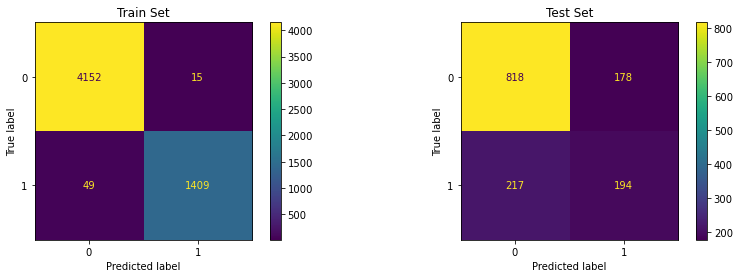

In [39]:
fig, ax = plt.subplots(1,2, figsize=(14,4))

plot_confusion_matrix(model,X_train,y_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")

plot_confusion_matrix(model,X_test,y_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")

Train results: 19 predictions where the model missed a malignant case and 0 cases where the model predicted cancer where the was none.
Test results: 5 predictions where the model misclassified malignant records and 2 cases where the model predicted a cancer where there was none.

# Performance Metrics

In [40]:
def evaluate_classification_model(y_train, y_pred_train, y_test, y_pred_test):
    """
    Generates performance metrics and comparisons of labels with their predicted values
    :param y_train: training labels
    :param y_pred_train: predictions from the model on the training set
    :param y_test: test labels
    :param y_pred_test: predictions from the model on the test set
    :returns: 3 dfs - Accuracy, Precision, and Recall scores, y_train vs. y_pred_train and y_test vs. y_pred_dist
    """
    performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train),
                                         precision_score(y_train, y_pred_train),
                                         recall_score(y_train, y_pred_train)],
                               'Test': [accuracy_score(y_test, y_pred_test),
                                        precision_score(y_test, y_pred_test),
                                        recall_score(y_test, y_pred_test)]})
    
    pd.options.display.float_format = '{:.2f}'.format

    df_train = pd.DataFrame({'Real': y_train, 'Predicted': y_pred_train})
    df_test  = pd.DataFrame({'Real': y_test,  'Predicted': y_pred_test})

    return performance_df, df_train, df_test



In [41]:
## calling the function
error_metrics_df,y_train_vs_predicted, y_test_vs_predicted =evaluate_classification_model(y_train, y_pred_train,y_test, y_pred)
error_metrics_df

,Error_metric,Train,Test
0,Accuracy,0.99,0.72
1,Precision,0.99,0.52
2,Recall,0.97,0.47


In [42]:
y_train_vs_predicted # train labels

,Real,Predicted
5481,1,1
5434,0,0
3569,0,0
2101,1,1
7019,0,0
...,...,...
5227,0,0
4067,0,0
1351,0,0
3460,0,0


In [43]:
y_test_vs_predicted # test labels

,Real,Predicted
6830,0,0
364,0,0
2067,0,0
6964,0,0
4868,1,0
...,...,...
4282,0,0
2617,1,1
2770,1,1
4906,0,0


# Fit a Knn Classifier(NOT KnnRegressor please!)model on the training data.

In [44]:
model = KNeighborsClassifier(n_neighbors=1,weights='uniform') # declare we're using knn classification model
model.fit(X_train, y_train) # train model
y_pred = model.predict(X_test) # predict test
y_pred_train=model.predict(X_train) # predict train (for sanity checks)
#model.predict_proba(inputdata)

# Confusion matrix

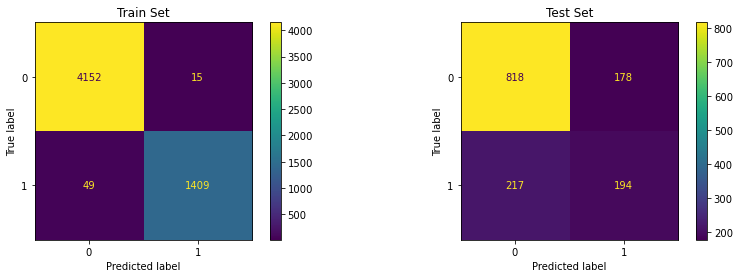

In [45]:
fig, ax = plt.subplots(1,2, figsize=(14,4))

plot_confusion_matrix(model,X_train,y_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")

plot_confusion_matrix(model,X_test,y_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")

# Performance Metrics

In [46]:
def evaluate_classification_model(y_train, y_pred_train, y_test, y_pred_test):
    """
    Generates performance metrics and comparisons of labels with their predicted values
    :param y_train: training labels
    :param y_pred_train: predictions from the model on the training set
    :param y_test: test labels
    :param y_pred_test: predictions from the model on the test set
    :returns: 3 dfs - Accuracy, Precision, and Recall scores, y_train vs. y_pred_train and y_test vs. y_pred_dist
    """
    performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train),
                                         precision_score(y_train, y_pred_train),
                                         recall_score(y_train, y_pred_train)],
                               'Test': [accuracy_score(y_test, y_pred_test),
                                        precision_score(y_test, y_pred_test),
                                        recall_score(y_test, y_pred_test)]})
    
    pd.options.display.float_format = '{:.2f}'.format

    df_train = pd.DataFrame({'Real': y_train, 'Predicted': y_pred_train})
    df_test  = pd.DataFrame({'Real': y_test,  'Predicted': y_pred_test})

    return performance_df, df_train, df_test



In [47]:
## calling the function
error_metrics_df,y_train_vs_predicted, y_test_vs_predicted =evaluate_classification_model(y_train, y_pred_train,y_test, y_pred)
error_metrics_df

,Error_metric,Train,Test
0,Accuracy,0.99,0.72
1,Precision,0.99,0.52
2,Recall,0.97,0.47


# Cross Validation to optimize for the Best Value of k


In [48]:
#from sklearn.model_selection import cross_val_score
import seaborn as sns
k_values = [i for i in range (1,31)]
scores = []

scaler = StandardScaler()
X = scaler.fit_transform(X)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=5)
    scores.append(np.mean(score))

Text(0, 0.5, 'Accuracy Score')

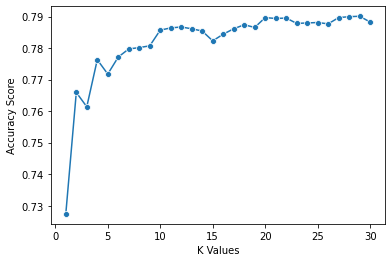

In [49]:
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

# Include both train and test sets to get the best k value

In [50]:
# try K=1 through K=25 and record testing accuracy
#from sklearn import metrics
k_range = range(1, 31)

# We can create Python dictionary using [] or dict()
scores = []

# We use a loop through the range 1 to 26
# We append the scores in the dictionary
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

print(scores)

[0.7192608386638237, 0.7540867093105899, 0.7505330490405118, 0.7640369580668088, 0.7683013503909026, 0.7789623312011372, 0.7825159914712153, 0.7775408670931059, 0.7810945273631841, 0.7818052594171997, 0.775408670931059, 0.775408670931059, 0.7782515991471215, 0.775408670931059, 0.7810945273631841, 0.7768301350390903, 0.7761194029850746, 0.7739872068230277, 0.7746979388770433, 0.7761194029850746, 0.7746979388770433, 0.767590618336887, 0.7704335465529495, 0.767590618336887, 0.7690120824449183, 0.7654584221748401, 0.7683013503909026, 0.7654584221748401, 0.7633262260127932, 0.7668798862828714]


Text(0, 0.5, 'Testing Accuracy')

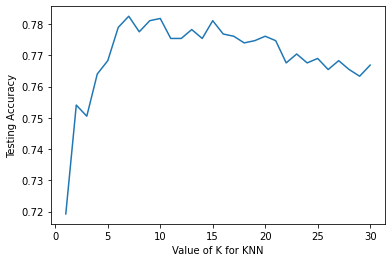

In [51]:
# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

# WEEK7, Day3

## Round 2
- Fit a Decision Tree Classifier on the traing data
- Check the accuracy on the test data

In [52]:
#df = pd.read_csv("DATA_Customer-Churn.csv")

#df

In [53]:
df

,tenure,senior_citizen,monthly_charges,total_charges,churn
0,1,0,29.85,29.85,0
1,34,0,56.95,1889.50,0
2,2,0,53.85,108.15,1
3,45,0,42.30,1840.75,0
4,2,0,70.70,151.65,1
...,...,...,...,...,...
7038,24,0,84.80,1990.50,0
7039,72,0,103.20,7362.90,0
7040,11,0,29.60,346.45,0
7041,4,1,74.40,306.60,1


In [63]:
#taking the above cleaned data
X, y = df(return_X_y=True,as_frame=True)
print(X.shape)
print(y.shape)

TypeError: 'DataFrame' object is not callable

In [65]:
X.shape, y.shape

((7032, 4), (7032,))

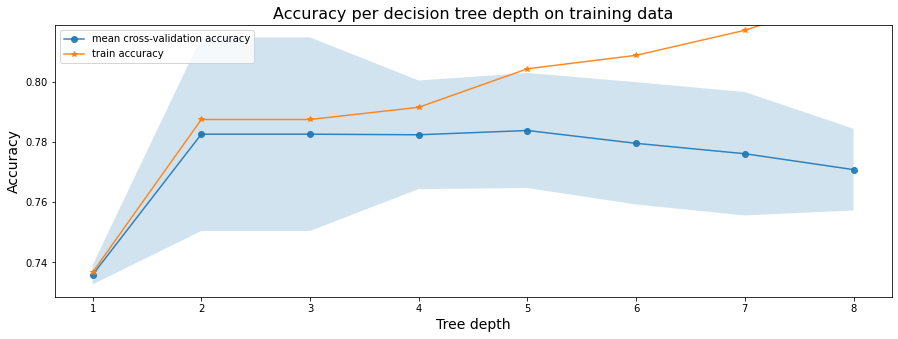

In [68]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

# function for fitting trees of various depths on the training data using cross-validation
def run_cross_validation_on_trees(X, y, tree_depths, cv=5, scoring='accuracy'):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []
    for depth in tree_depths:
        tree_model = DecisionTreeClassifier(max_depth=depth)
        cv_scores = cross_val_score(tree_model, X, y, cv=cv, scoring=scoring)
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        accuracy_scores.append(tree_model.fit(X, y).score(X, y))
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    return cv_scores_mean, cv_scores_std, accuracy_scores
  
# function for plotting cross-validation results
def plot_cross_validation_on_trees(depths, cv_scores_mean, cv_scores_std, accuracy_scores, title):
    fig, ax = plt.subplots(1,1, figsize=(15,5))
    ax.plot(depths, cv_scores_mean, '-o', label='mean cross-validation accuracy', alpha=0.9)
    ax.fill_between(depths, cv_scores_mean-2*cv_scores_std, cv_scores_mean+2*cv_scores_std, alpha=0.2)
    ylim = plt.ylim()
    ax.plot(depths, accuracy_scores, '-*', label='train accuracy', alpha=0.9)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Tree depth', fontsize=14)
    ax.set_ylabel('Accuracy', fontsize=14)
    ax.set_ylim(ylim)
    ax.set_xticks(depths)
    ax.legend()

# fitting trees of depth 1 to 8
sm_tree_depths = range(1,9)
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_trees(X_train, y_train, sm_tree_depths)

# plotting accuracy
plot_cross_validation_on_trees(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores, 
                               'Accuracy per decision tree depth on training data')


    
 

,Error_metric,Train,Test
0,Accuracy,0.82,0.77
1,Precision,0.69,0.60
2,Recall,0.55,0.47


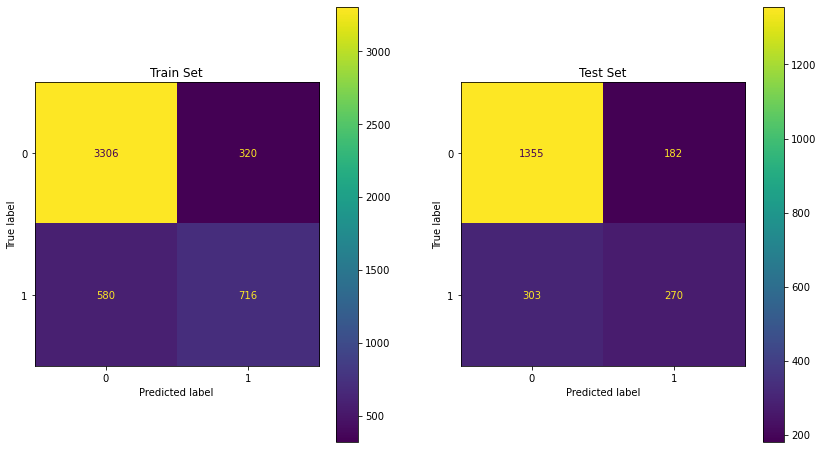

In [69]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=11)

# Bear in mind that sklearn uses a different function for decission trees used for 
# classification ( to predict a categorical feature ): DecisionTreeClassifier() 
model = DecisionTreeClassifier(max_depth=7)

model.fit(X_train, y_train)

y_pred_train_dt = model.predict(X_train)
y_pred_test_dt = model.predict(X_test)


performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt),
                                         recall_score(y_train, y_pred_train_dt)],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt),
                                        recall_score(y_test, y_pred_test_dt)]})

display(performance_df)

fig, ax = plt.subplots(1,2, figsize=(14,8))


#print("Confusion matrix for the train set")
#print(confusion_matrix(y_train,y_pred_train_dt).T)
plot_confusion_matrix(model,X_train,y_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")

#print("Confusion matrix for the test set")

#print(confusion_matrix(y_test,y_pred_test_dt).T)
plot_confusion_matrix(model,X_test,y_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")

In [ ]:
#When depth=3
#Error_metric	Train	Test
#0	Accuracy	0.79	0.77
#1	Precision	0.71	0.67
#2	Recall	    0.33	0.30.

## Feature importance

<BarContainer object of 4 artists>

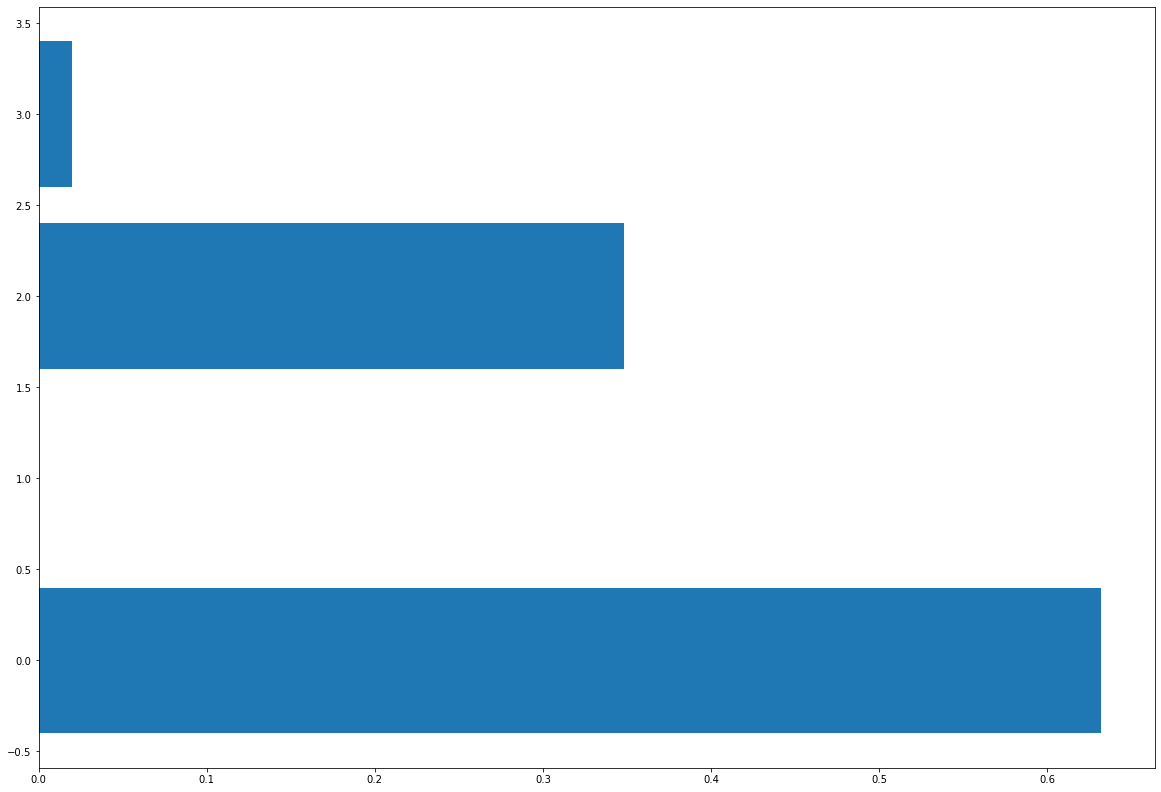

In [61]:
X=pd.DataFrame(X)
plt.figure(figsize=(20,14))
plt.barh(X.columns,model.feature_importances_)

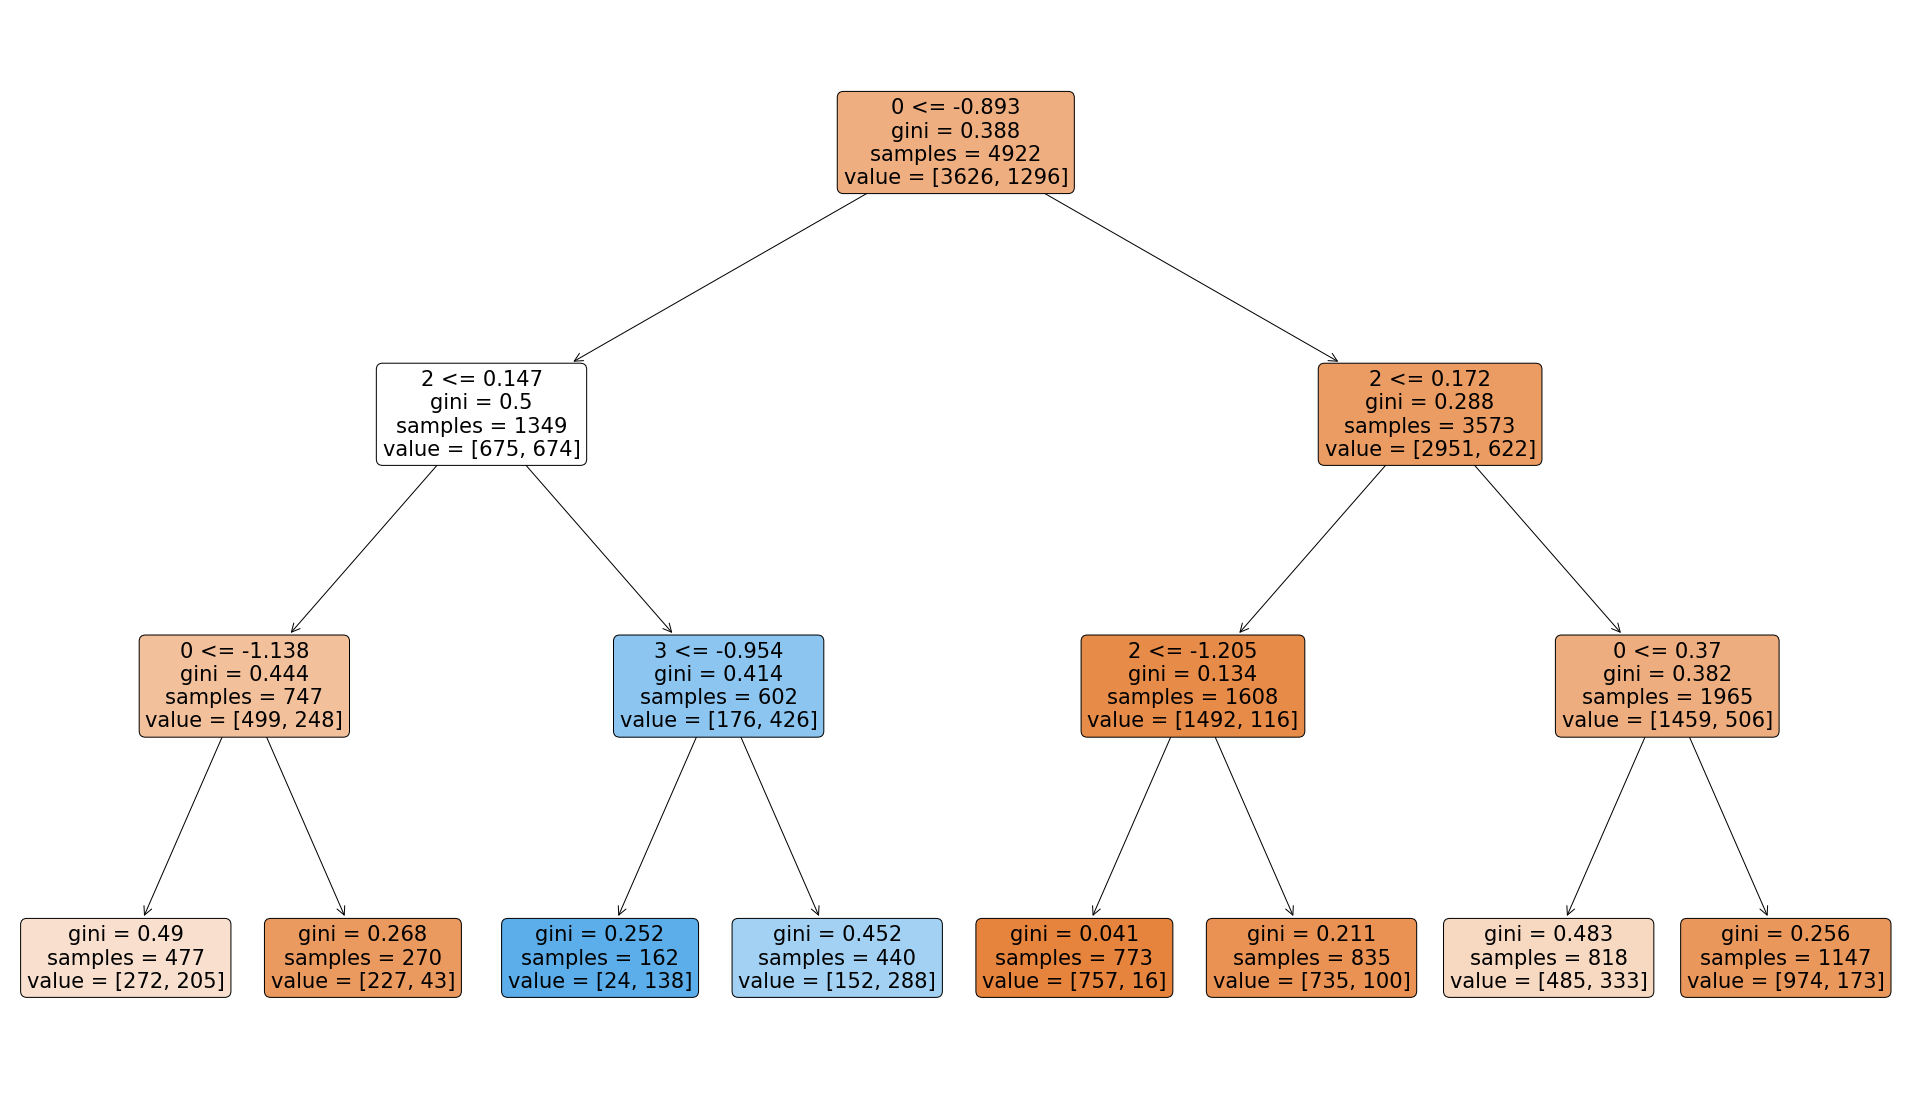

In [62]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (34,20))

plot_tree(model,filled = True, rounded=True,feature_names=X.columns)
plt.show() 